# Ramp : Prediction of the field of graduate studies for French students

Jules Dupont, Ambroise Bertin, Suzanne Guilteaux, Maelle Cornec, Lauriane Mousset (Université Paris-Saclay, AgroParisTech - DataCamp 2023)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Loading

In [2]:
path = "./data/train.csv"
df = pd.read_csv(path, sep=",")

In [3]:
df.head()

annee     diplome numero_de_l_etablissement            etablissement  \
0   2014  MASTER LMD                  0720916E                  Le Mans   
1   2018  MASTER LMD                  0440984F                   Nantes   
2   2014  MASTER LMD                  0941111X        Paris-Est Créteil   
3   2018  MASTER ENS                  0211237F        Dijon - Bourgogne   
4   2017  MASTER LMD                  0060931E  Nice - Sophia-Antipolis   

            etablissementactuel code_de_l_academie academie code_du_domaine  \
0                           NaN                A17   Nantes             DEG   
1             Nantes Université                A17   Nantes             DEG   
2                           NaN                A24  Créteil             STS   
3                           NaN                A07    Dijon            MEEF   
4  Université Côte d'Azur (UCA)                A23     Nice             DEG   

                           domaine code_de_la_discipline  ...  \
0       Droit, économie et gestion                disc04  ...   
1       Droit, économie et gestion                disc02  ...   
2  Sciences, technologies et santé                disc12  ...   
3             Masters enseignement                disc18  ...   
4       Droit, économie et gestion                disc05  ...   

  taux_de_chomage_regional salaire_net_mensuel_median_regional emplois_cadre  \
0                      8.0                              1760.0           NaN   
1                      6.7                              1830.0          74.0   
2                      8.3                              2050.0          70.0   
3                      6.6                              1820.0          91.0   
4                      9.1                              1840.0           NaN   

   emplois_exterieurs_a_la_region_de_luniversite  femmes  \
0                                            NaN     NaN   
1                                           45.0    64.0   
2                                           21.0    42.0   
3                                           17.0    74.0   
4                                            NaN     NaN   

   salaire_net_mensuel_regional_1er_quartile  \
0                                     1430.0   
1                                     1470.0   
2                                     1610.0   
3                                     1440.0   
4                                     1400.0   

   salaire_net_mensuel_regional_3eme_quartile                    cle_etab  \
0                                      2060.0                  Le Mans_18   
1                                      2180.0                   Nantes_30   
2                                      2560.0        Paris-Est Créteil_18   
3                                      2160.0        Dijon - Bourgogne_30   
4                                      2220.0  Nice - Sophia-Antipolis_30   

    cle_disc  id_paysage  
0  disc04_18       9xlel  
1  disc02_30       7hB8r  
2  disc12_18       vb71K  
3  disc18_30       Lr94O  
4  disc05_30       7CYWd  

[5 rows x 35 columns]

# Data Description

In [4]:
df.shape
print('The dataframe has ', df.shape[0], 'rows and ', df.shape[1], ' variables.')

The dataframe has  12545 rows and  35  variables.


In [5]:
df.columns

Index(['annee', 'diplome', 'numero_de_l_etablissement', 'etablissement',
       'etablissementactuel', 'code_de_l_academie', 'academie',
       'code_du_domaine', 'domaine', 'code_de_la_discipline', 'discipline',
       'situation', 'remarque', 'nombre_de_reponses', 'taux_de_reponse',
       'poids_de_la_discipline', 'taux_dinsertion', 'taux_d_emploi',
       'taux_d_emploi_salarie_en_france',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers',
       'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes', 'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile', 'cle_etab', 'cle_disc',
       'id_paysage'],
      dtype='object')

Libellés des variables des fichiers exportés (pour l'année N).
- nombre_de_reponses : Nombre de réponses
- taux_de_reponse : Taux de réponse
- poids_de_la_discipline : Poids de la discipline 
- emplois_cadre_ou_professions_intermediaires : Part des emplois de niveau cadre ou profession intermediaries
- emplois_stables : Part des emplois stables
- emplois_a_temps_plein : Part des emplois à temps plein
- salaire_net_median_des_emplois_a_temps_plein : Salaire net mensuel médian des emplois à temps plein
- salaire_brut_annuel_estime : Salaire brut annuel médian estimé
- de_diplomes_boursiers : Part des diplômés boursiers dans l'établissement
- taux_de_chomage_regional : Taux de chômage régional (INSEE : 4ème trimestre N+2)
- salaire_net_mensuel_median_regional : Salaire mensuel net médian des jeunes de 25 à 29 ans employés à temps plein dans les catégories cadre et professions intermédiaires (INSEE : DADS N)
- taux_dinsertion : Taux d'insertion
- emplois_cadre : Part des emplois de niveau cadre (Dans certains secteurs d'activité, les emplois correspondants au diplôme ne sont pas tous de niveau cadre. L'accès au niveau cadre peut nécessiter une expérience professionnelle préalable.)
- emplois_exterieurs_a_la_region_de_luniversite Part des emplois situés en dehors de la région de l'établissement (y compris à l'étranger)
- femmes : Part des femmes

Source: [ici](https://www.data.gouv.fr/fr/datasets/insertion-professionnelle-des-diplomes-de-master-en-universites-et-etablissements-assimil-0/#/resources).

In [6]:
df['emplois_exterieurs_a_la_region_de_luniversite'].value_counts()

emplois_exterieurs_a_la_region_de_luniversite
39.0    165
50.0    157
48.0    156
41.0    151
45.0    143
       ... 
95.0      2
92.0      2
85.0      2
91.0      2
90.0      1
Name: count, Length: 96, dtype: int64

We see here that we have a lot of missing values (ns, nd) that we need to deal with. According to the official source, nd = non disponible (aucun répondant) ns = non significatif (nombre de répondants inférieur à 30).

## Data Types and Missing Values

In [7]:
# Separation of the numerical and categorical data into two lists.

all_categorical_data = [
    "annee",
    "diplome", 
    "numero_de_l_etablissement",
    "etablissement",
    "etablissementactuel",
    "code_de_l_academie",
    "academie",
    "code_du_domaine",
    "domaine", 
    "code_de_la_discipline",
    "discipline",
    "situation", 
    "remarque",
    "cle_etab",
    "cle_disc",
    "id_paysage"
]

all_numerical_data = [
    "nombre_de_reponses", 
    "taux_de_reponse",
    "poids_de_la_discipline",
    "taux_dinsertion",
    "taux_d_emploi", 
    "taux_d_emploi_salarie_en_france",
    "emplois_cadre_ou_professions_intermediaires",
    "emplois_stables",
    "emplois_a_temps_plein",
    "salaire_net_median_des_emplois_a_temps_plein",
    "salaire_brut_annuel_estime",
    "de_diplomes_boursiers",
    "taux_de_chomage_regional",
    "salaire_net_mensuel_median_regional",
    "emplois_cadre",
    "emplois_exterieurs_a_la_region_de_luniversite",
    "femmes", 
    "salaire_net_mensuel_regional_1er_quartile",
    "salaire_net_mensuel_regional_3eme_quartile",
]

assert len(all_categorical_data) + len(all_numerical_data) == len(df.columns)


Data are not all typed as inteded, moreover some features contain non recognized strings that we need to deal with.

In [8]:
def set_type(df, categorical_data, numerical_data, to_replace):
    """
    Convert data types of specified columns in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to modify.
    categorical_data (list of str): A list of column names to be converted to the 'category' data type.
    numerical_data (list of str): A list of column names to be converted to the 'float64' data type.
    to_replace (list of str): A list of values to replace in the DataFrame before conversion.

    Returns:
    pandas.DataFrame: DataFrame with specified columns converted to the desired data types and values 
    replaced as specified.
    """
    df.replace(to_replace=to_replace, value="NaN", inplace=True)
    df[categorical_data] = df[categorical_data].astype("category")
    df[numerical_data] = df[numerical_data].astype("float64")
    return df

to_replace = [".", "nan", "nd", "fe", "ns"]
df = set_type(df, all_categorical_data, all_numerical_data, to_replace)

In [9]:
df["domaine"].value_counts(dropna=False)

domaine
Sciences, technologies et santé    4174
Droit, économie et gestion         3589
Sciences humaines et sociales      3254
Masters enseignement                800
Lettres, langues, arts              728
Name: count, dtype: int64

In [10]:
# Calculate number and proportion of missing values for each numerical column
missing_data = pd.DataFrame(columns=['Number of Missing Values', 'Proportion'])

for col in all_numerical_data:
     num_missing = df[col].isnull().sum()
     proportion_missing = num_missing / len(df) * 100
     missing_data.loc[col] = [num_missing, proportion_missing]

# Sort the DataFrame by the "Proportion" column in descending order
missing_data_sorted = missing_data.sort_values(by='Proportion', ascending=False)

# Print the sorted DataFrame
print(missing_data_sorted)

                                               Number of Missing Values  \
taux_d_emploi                                                   11883.0   
taux_d_emploi_salarie_en_france                                 11883.0   
salaire_net_median_des_emplois_a_temps_plein                     7236.0   
salaire_brut_annuel_estime                                       7122.0   
emplois_cadre                                                    6546.0   
emplois_exterieurs_a_la_region_de_luniversite                    6437.0   
emplois_cadre_ou_professions_intermediaires                      6240.0   
emplois_a_temps_plein                                            6206.0   
emplois_stables                                                  6167.0   
femmes                                                           5889.0   
taux_dinsertion                                                  5562.0   
salaire_net_mensuel_regional_1er_quartile                        1702.0   
salaire_net_mensuel_regio

In [11]:
# Calculate number and proportion of missing values for each categorical column
missing_data = pd.DataFrame(columns=['Number of Missing Values', 'Proportion'])

for col in all_categorical_data:
     num_missing = df[col].isnull().sum()
     proportion_missing = num_missing / len(df) * 100
     missing_data.loc[col] = [num_missing, proportion_missing]

# Sort the DataFrame by the "Proportion" column in descending order
missing_data_sorted = missing_data.sort_values(by='Proportion', ascending=False)

# Print the sorted DataFrame
print(missing_data_sorted)

                           Number of Missing Values  Proportion
remarque                                    11539.0   91.980869
etablissementactuel                          9705.0   77.361499
code_de_l_academie                            231.0    1.841371
academie                                      231.0    1.841371
id_paysage                                    231.0    1.841371
annee                                           0.0    0.000000
diplome                                         0.0    0.000000
numero_de_l_etablissement                       0.0    0.000000
etablissement                                   0.0    0.000000
code_du_domaine                                 0.0    0.000000
domaine                                         0.0    0.000000
code_de_la_discipline                           0.0    0.000000
discipline                                      0.0    0.000000
situation                                       0.0    0.000000
cle_etab                                

<Axes: >

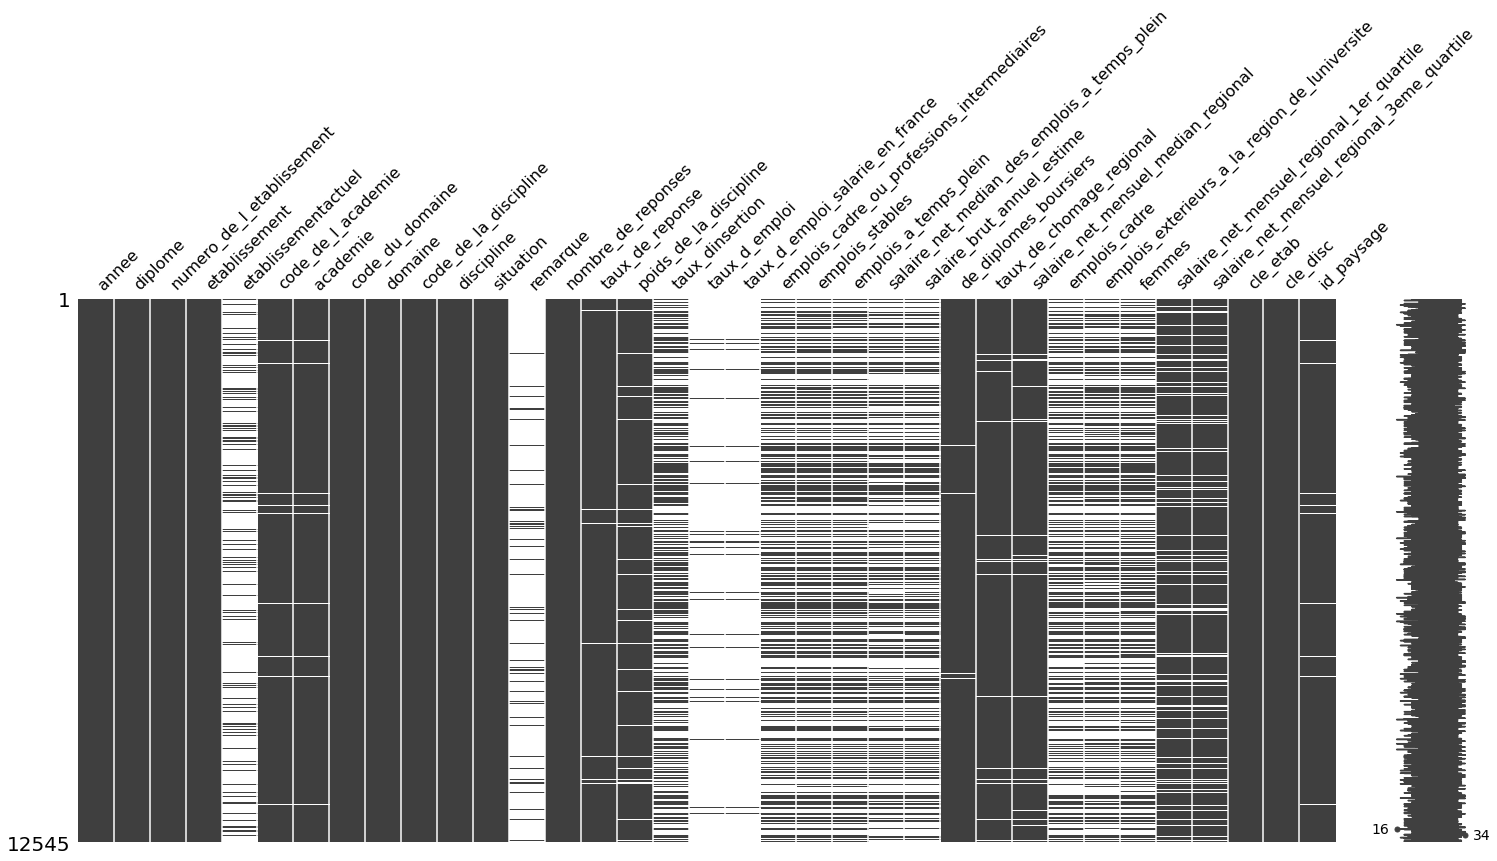

In [12]:
# Missing data matrix plot

import missingno as msno
msno.matrix(df)

In respect to the missing data matrix plot, we decide to remove the columns for which we have a high proportion of missing values (more than 75% of missing values). 

## Feature selection

In this section, we drop columns containing too many missing values, non informative variables or hard to interpret (due to a lack of description of the label after visiting the source website and annexes) and redundant descriptors. 

In [13]:
df.columns

Index(['annee', 'diplome', 'numero_de_l_etablissement', 'etablissement',
       'etablissementactuel', 'code_de_l_academie', 'academie',
       'code_du_domaine', 'domaine', 'code_de_la_discipline', 'discipline',
       'situation', 'remarque', 'nombre_de_reponses', 'taux_de_reponse',
       'poids_de_la_discipline', 'taux_dinsertion', 'taux_d_emploi',
       'taux_d_emploi_salarie_en_france',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers',
       'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes', 'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile', 'cle_etab', 'cle_disc',
       'id_paysage'],
      dtype='object')

In [14]:
# Dropping columns with more than 50% of missing values
to_drop= ['taux_d_emploi', 'taux_d_emploi_salarie_en_france', 'remarque',
            'etablissementactuel']
df.drop(columns=to_drop, inplace=True)

In [15]:
# Dropping non informative, unknown columns (no description of the column label, hard to interpret)
# and redundant ones.
to_drop2= ['nombre_de_reponses', 'taux_de_reponse', 'id_paysage','cle_etab', 'cle_disc', 
            'numero_de_l_etablissement', 'code_de_l_academie', 'code_du_domaine', 
            'code_de_la_discipline', 'poids_de_la_discipline']
df.drop(columns=to_drop2, inplace=True)

In [16]:
#len(df.columns)
print("Number of columns : ", len(df.columns))

Number of columns :  21


## Data Visualization

We want to try to predict 'domain' using our different features. To better have an idea of the relationships between the variables in respect to 'domain', we decided to do some plots.

In [17]:
target_name = "domaine"

categorical_data = [
    "annee", # we consider 'annee' as categorial 
    # "diplome", because proxy of target
    "etablissement",
    "academie",
    #"domaine", #Car target actuelle, décommenter si plus le cas
    #"discipline",# a voir si on garde, si domaine target car ~~ proxy
    "situation"
]

numerical_data = [
    "taux_dinsertion", 
    "emplois_cadre_ou_professions_intermediaires",
    "emplois_stables",
    "emplois_a_temps_plein",
    "salaire_net_median_des_emplois_a_temps_plein",
    "salaire_brut_annuel_estime",
    "de_diplomes_boursiers",
    "taux_de_chomage_regional",
    "salaire_net_mensuel_median_regional",
    "emplois_cadre",
    "emplois_exterieurs_a_la_region_de_luniversite",
    "femmes", 
    "salaire_net_mensuel_regional_1er_quartile",
    "salaire_net_mensuel_regional_3eme_quartile",
]

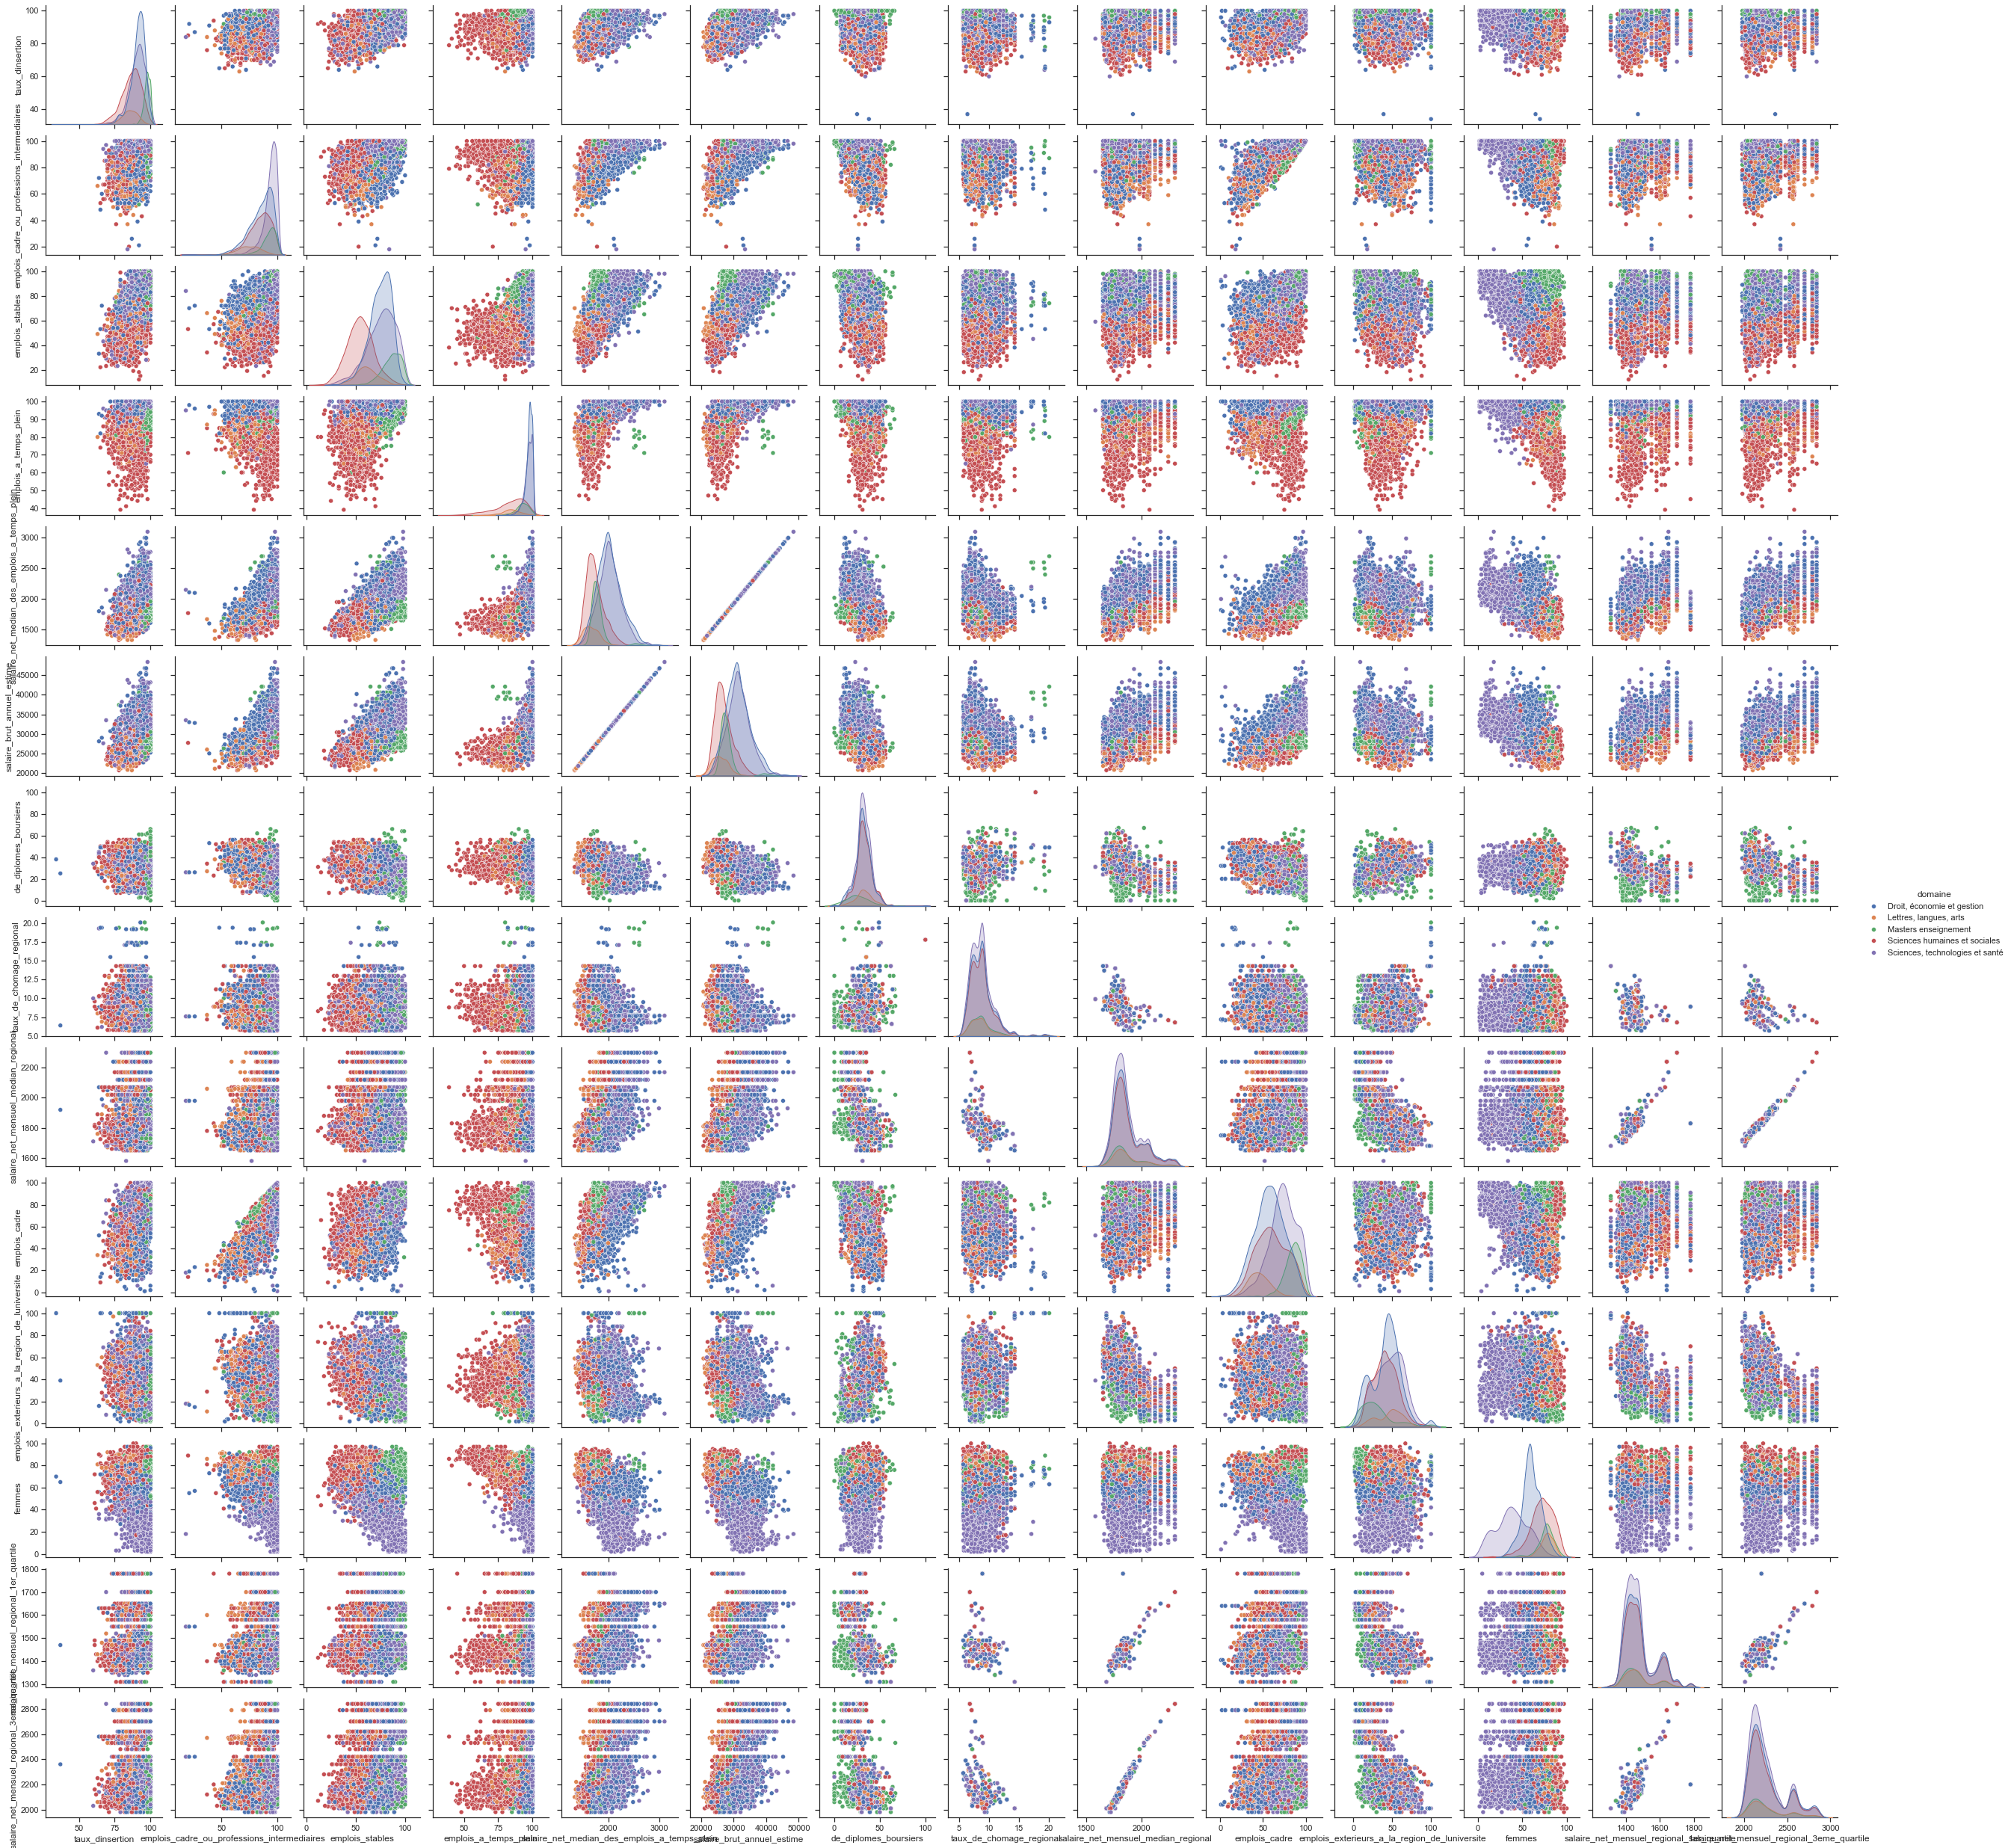

In [18]:
import seaborn as sns
sns.set_theme(style="ticks")

#Creating a subdataset
plots_numerical = df[numerical_data].copy()
plots_numerical['domaine']=df['domaine']
#plots_numerical.dtypes

# Pairplots with 'domaine' as categorical
sns.pairplot(plots_numerical, hue="domaine")

As expected, there is a linear relationship between salaire_net_mensuel_median_regional, salaire_net_mensuel_regional_1er_quartile, salaire_net_mensuel_regional_3eme_quartile and salaire_brut_annuel_estimé. 

We observe that people in Lettres, langues et arts and in Sciences humaines et sociales tend to be less paid that those in Droit, économie et gestion and Sciences, technologies et santé. Moreover, we also notice there is a higher proportion of women in Lettres, langues et arts and in Sciences humaines et sociales than in Sciences, technologies et santé.

c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(-31.75, 0.5, '')]

c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


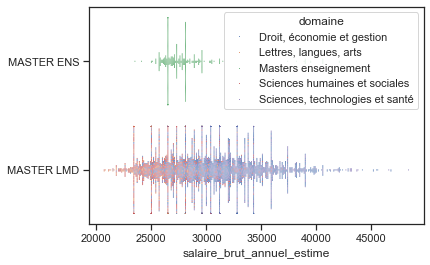

In [19]:
# Categorical scatterplots to show each observation
ax = sns.swarmplot(data=df, x="salaire_brut_annuel_estime", y="diplome", hue="domaine", size=1)
ax.set(ylabel="")

We see that the domaine "Masters enseignement" corresponds to people who graduated from a Master ENS. We also confirm that people who did a Master LMD in Sciences humaines et sociales or Lettres, langues et arts tend to earn less than those who got a diploma in Sciences, technologies et santé or Droit, économie et gestion. 

The feature "diplome" should be removed then, as it serves as a virtual proxy to the target

The 'situation' does not seem to change the overall distribution of the salaire_brut_annuel_estime even though we notice more outliers that shifted to the left of the graph for salaries  "30 mois après le diplôme".

# Pipeline

We decided to predict `domaine` because it is a categorical data. We saw on the pairplot that this could be possible to differenciate different `domaine` among the multiple features.

In [20]:
X = df.drop(target_name, axis=1)
X = X[categorical_data + numerical_data]
y = df[target_name]

<Axes: >

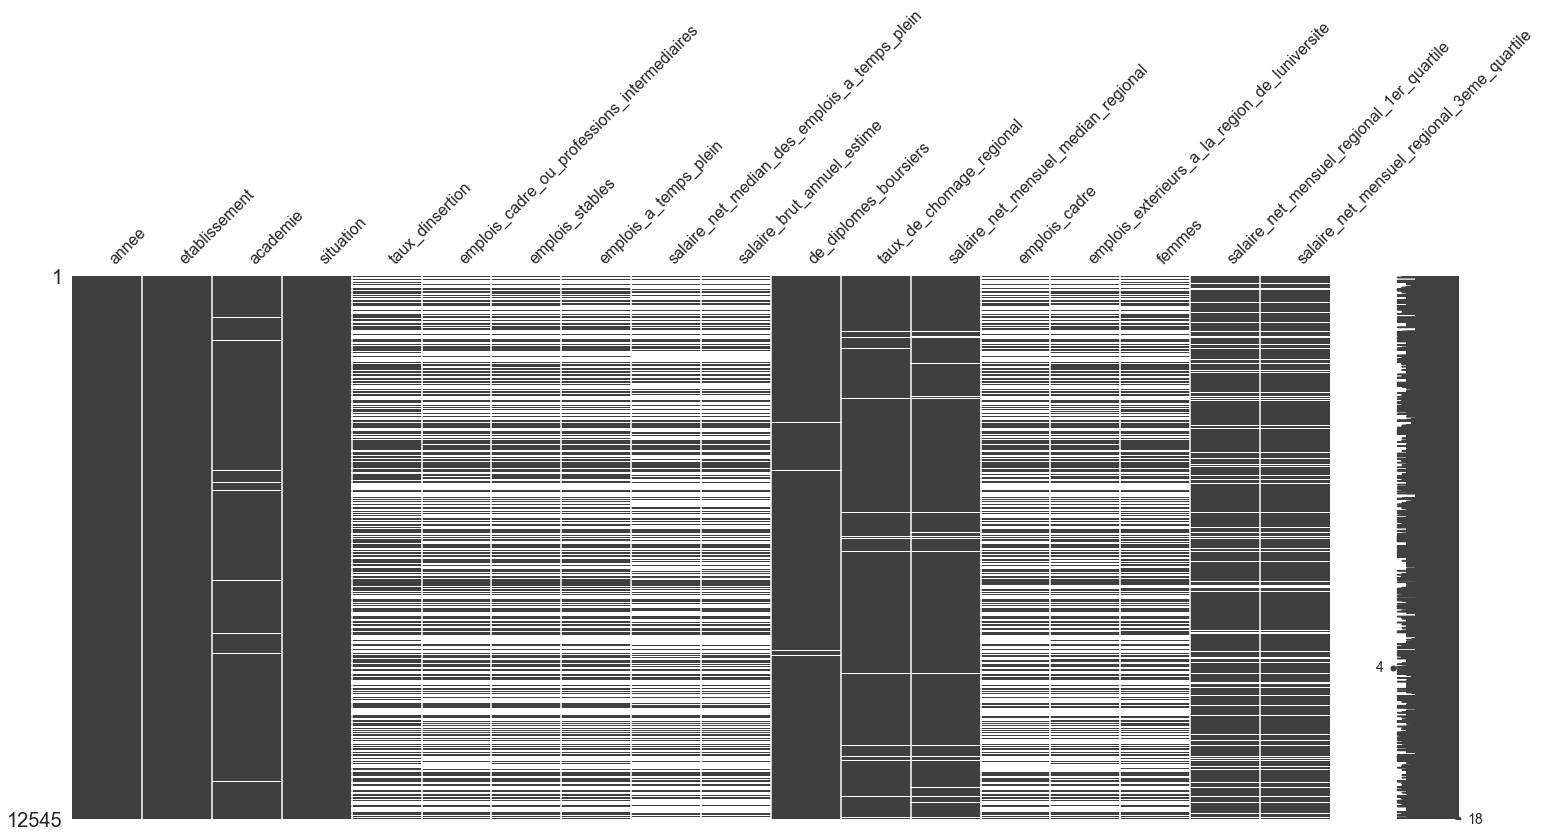

In [21]:
msno.matrix(X)

Enfin, on pourra séparer le dataset en train/validation. 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
    # stratify= ? à changer si on veut stratifier en fonction des années
)

Ici on définira les fonctions de preprocessing pour les attributs catégoriels et numériques.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# OneHot_categorical = []
# Ordinal_categorical = []
# assert len(OneHot_categorical) + len(Ordinal_categorical) == len(categorical_data)

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    #("imputer", IterativeImputer()),  #vous pouvez jouer avec les imputers, KNN, SimpleImputer...
    ("std_scaler", StandardScaler()), # exemple de transformation
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), # vous pouvez utiliser une autre stratégie
    # mais il faudra intervertir le imputer et le onehot car la plupart des imputers nécessitent des 
    # valeurs numériques
    ("one_hot", OneHotEncoder()),

    # exemple de transformation: il faudra probablement faire un encodage différent
    # ou faire un one hot encoding que sur les variables catégorielles qui ont peu de modalités
    # et faire un ordinal encoding sur les autres
    # Ou encore, choisir un autre type de simple imputer
    # cad subdiviser categorical_pipeline en deux !
])

preprocessing_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, numerical_data),
    ("catategorical", categorical_pipeline, categorical_data),
])

Ici on créera le pipeline final, qui regroupe le preprocessing et le modèle choisi (régression/classification en fonction du problème).

Le dummy_model est la baseline, le but c'est de faire mieux que lui, encore et encore jusqu'à ce que Sisyphe nous rattrape.

ça sert à rien de faire dans le détail les différents modèles, mais c'est histoire de montrer les possibilités. Si modèle non utilisé, commenter la ligne dans la variable model (cf en dessous)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import NearMiss, RandomUnderSampler

from sklearn.feature_selection import SelectFromModel 
# si vous voulez utiliser une sélection de variable !
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
# à mettre après le preprocessing, usuellement avant le sampler mais pas obligatoire !
# ça fera des résultats différents cependant

dummy_model = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("model", DummyClassifier(strategy="stratified"))
])

logistic_model = ImbPipeline([
    ("preprocessing", preprocessing_pipeline),
    #("sampler", NearMiss()),
    ("model", LogisticRegression(max_iter=1000))
])

linearSVC_model = ImbPipeline([
    ("preprocessing", preprocessing_pipeline),
    #("sampler", NearMiss()),
    ("model", SVC(kernel="linear", class_weight="balanced",max_iter=500, probability=True))
])

random_forest_model = ImbPipeline([
    ("preprocessing", preprocessing_pipeline),
    #("sampler", RandomUnderSampler()),
    ("model", RandomForestClassifier(class_weight="balanced")),
]
)

voting_clf = VotingClassifier([
    ("rf", random_forest_model),
    ("logistic", logistic_model), 
    ("linearSVC", linearSVC_model)
], voting="soft")

# comment the lines you don't want to fit later on
models = [
    ("dummy", dummy_model),
    ("logistic", logistic_model),
    ("linearSVC", linearSVC_model),
    ("random_forest", random_forest_model),
    ("voting_clf", voting_clf)
]

# Model evaluation

In [25]:
from tqdm import tqdm

for name, model in tqdm(models):
    print(f"\n model {name} training... \n")
    model.fit(X_train, y_train)

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:00,  5.46it/s]


 model dummy training... 


 model logistic training... 



 40%|████      | 2/5 [00:01<00:01,  1.51it/s]


 model linearSVC training... 



c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 60%|██████    | 3/5 [00:25<00:22, 11.28s/it]


 model random_forest training... 



 80%|████████  | 4/5 [01:05<00:22, 22.95s/it]


 model voting_clf training... 



c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
100%|██████████| 5/5 [02:06<00:00, 25.35s/it]


--------------------
model: DummyClassifier(strategy='stratified')
accuracy: 0.25906735751295334
precision: 0.25894386899261707
recall: 0.25906735751295334
f1: 0.25895488080869605
--------------------


<Figure size 1080x1080 with 0 Axes>

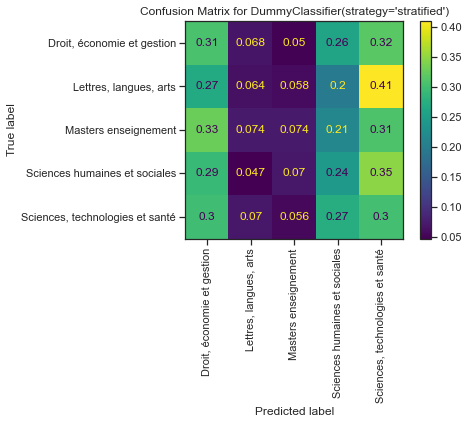

--------------------
model: LogisticRegression(max_iter=1000)
accuracy: 0.5886807493025109
precision: 0.5975907622760367
recall: 0.5886807493025109
f1: 0.5804295393318836
--------------------


<Figure size 1080x1080 with 0 Axes>

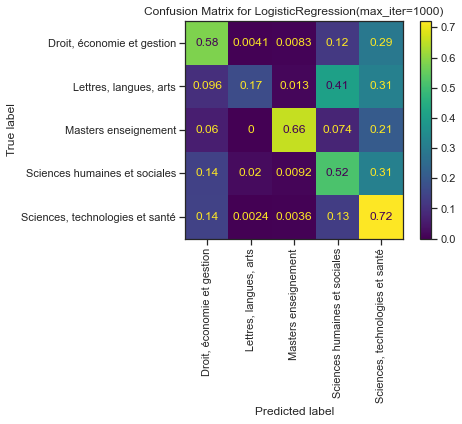

--------------------
model: SVC(class_weight='balanced', kernel='linear', max_iter=500, probability=True)
accuracy: 0.31008369868473495
precision: 0.4379956782545722
recall: 0.31008369868473495
f1: 0.3154089740735728
--------------------


<Figure size 1080x1080 with 0 Axes>

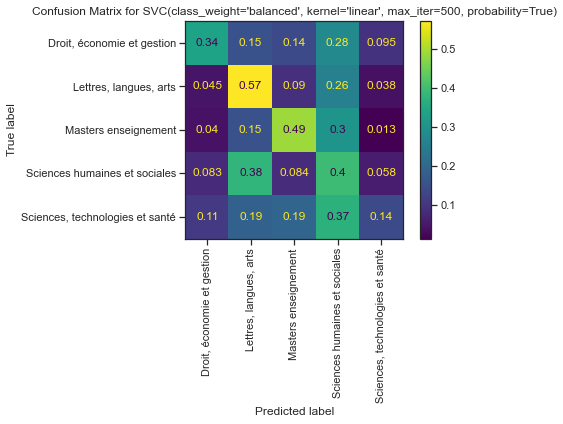

--------------------
model: RandomForestClassifier(class_weight='balanced')
accuracy: 0.5707453168593065
precision: 0.5860209738923672
recall: 0.5707453168593065
f1: 0.5778064465749253
--------------------


<Figure size 1080x1080 with 0 Axes>

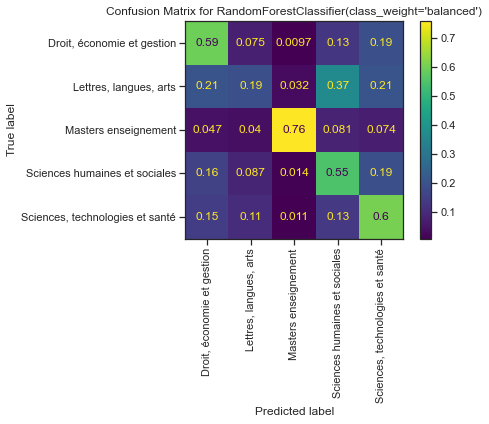

--------------------
model: Voting classifier
accuracy: 0.6030290952570745
precision: 0.6277138136836931
recall: 0.6030290952570745
f1: 0.5943500120295142
--------------------


<Figure size 1080x1080 with 0 Axes>

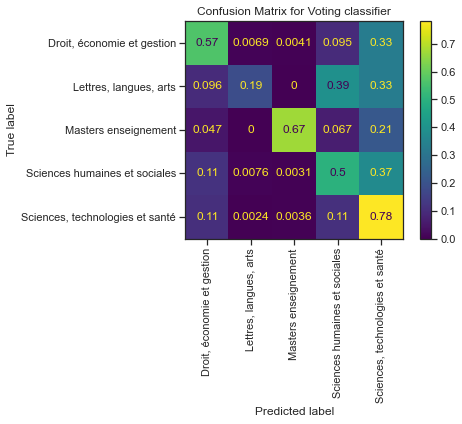

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

def metrics(model, X_test, y_test, plot=True):
    y_pred = model.predict(X_test)
    print("--------------------")
    try:
        model_str = model.steps[-1][1]
    except AttributeError:
        model_str = "Voting classifier"

    print("model:", model_str)
    print("accuracy:", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred, average="weighted"))
    print("recall:", recall_score(y_test, y_pred, average="weighted"))
    print("f1:", f1_score(y_test, y_pred, average="weighted"))
    print("--------------------")
    if plot:
        plt.figure(figsize=(15, 15))
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", xticks_rotation="vertical")
        plt.title("Confusion Matrix for " + str(model_str))
        plt.show()
    
for name, model in models:
    metrics(model, X_test, y_test, plot = True)

Explain here how you interpret these results + add maybe features importance in the model etc - check if this is needed for the challenge.

In [27]:
from sklearn.model_selection import cross_val_score

def metrics_with_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    print("--------------------")
    print("model:", model.steps[1][1])
    print("cross validation scores:", scores)
    print("mean cross validation score:", scores.mean())
    print("--------------------")
    return scores.mean()

best_model = None
best_score = 0

for name, model in tqdm(models):
    score = metrics_with_cross_validation(model, X, y)
    if score > best_score:
        best_score = score
        best_model = name

print("The model with the highest mean cross-validation score is:", best_model)

  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 993, in score
    Xt = transform.transform(Xt)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_t

--------------------
model: DummyClassifier(strategy='stratified')
cross validation scores: [0.27421283 0.28098844 0.26265444        nan 0.26385014]
mean cross validation score: nan
--------------------


c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py", line 913, in score
    Xt = transform.transform(Xt)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)

--------------------
model: LogisticRegression(max_iter=1000)
cross validation scores: [0.60023914 0.61578318 0.59744918        nan 0.59665205]
mean cross validation score: nan
--------------------


c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

--------------------
model: SVC(class_weight='balanced', kernel='linear', max_iter=500, probability=True)
cross validation scores: [0.33280191 0.34196891 0.37744121        nan 0.44041451]
mean cross validation score: nan
--------------------


c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py", line 913, in score
    Xt = transform.transform(Xt)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)

--------------------
model: RandomForestClassifier(class_weight='balanced')
cross validation scores: [0.57313671 0.57951375 0.5675568         nan 0.57114388]
mean cross validation score: nan
--------------------


c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

--------------------


AttributeError: 'VotingClassifier' object has no attribute 'steps'

# Hyperoptimization

In [28]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        # Add other hyperparameters you want to tune
    }
    
    gradient_boosting_model = Pipeline([
        ("preprocessing", preprocessing_pipeline),
        ("model", GradientBoostingClassifier(**params))
    ])
    
    scores = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5)
    return scores.mean()

study = optuna.create_study(direction='maximize')

for _ in tqdm(range(1)):
    study.optimize(objective, n_trials=1)

[I 2024-03-01 10:55:55,922] A new study created in memory with name: no-name-267dbf96-b793-4836-bb47-9b00ae4eab87
  0%|          | 0/1 [00:00<?, ?it/s][W 2024-03-01 11:01:09,469] Trial 0 failed with parameters: {'n_estimators': 383, 'learning_rate': 0.11023797685997995, 'max_depth': 9} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Lauriane\AppData\Local\Temp\ipykernel_3568\843872911.py", line 17, in objective
    scores = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\Lauriane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selecti

KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cbc7f11-67c5-4a55-b813-8316a388e7b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>